<a href="https://colab.research.google.com/github/kaustubh-karthik/NEA_project/blob/master/NEA_beat_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install pydub
from pydub import AudioSegment
import wave
import scipy
import numpy as np
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
sound = AudioSegment.from_wav("pasoori (3).wav")
sound = sound.set_channels(1)
sound.export("pasoori.wav", format="wav")

<_io.BufferedRandom name='pasoori.wav'>

9885696 44100
[  1.    1.8   3.3   4.3   6.5   7.3   8.6   9.6  10.6  12.2  13.8  15.
  15.8  16.9  18.7  22.6  24.4  25.9  27.4  28.7  29.1  30.6  33.1  34.1
  34.9  35.8  37.4  38.9  40.3  42.1  42.3  45.6  48.5  49.9  51.   53.7
  55.9  59.1  60.2  61.7  63.3  64.6  66.   66.9  68.1  69.5  70.5  72.2
  74.3  78.2  78.4  80.3  82.6  83.6  84.7  85.4  86.7  89.9  92.1  93.7
  96.1  97.1  98.5  99.3 100.6 103.7 104.8 106.1 106.8 108.1 109.2 110.2
 113.7 115.  115.7 117.3 118.8 119.8 120.9 122.2 124.3 126.7 128.3 129.8
 131.6 133.1 134.9 141.5 145.1 145.9 147.4 148.9 150.4 151.4 152.5 153.5
 154.8 156.  157.4 158.7 160.  161.4 162.1 163.5 165.1 167.1 168.5 171.8
 172.1 173.4 174.3 176.6 178.7 180.2 181.3 182.7 184.  185.2 186.5 187.5
 189.2 190.1 191.1 192.4 194.5 195.5 196.7 197.7 198.9 200.1 201.  202.4
 203.3 204.7 206.1 207.1 208.6 210.  210.9 212.1 213.  217.3 218.2 220.7
 221.7 222.8]


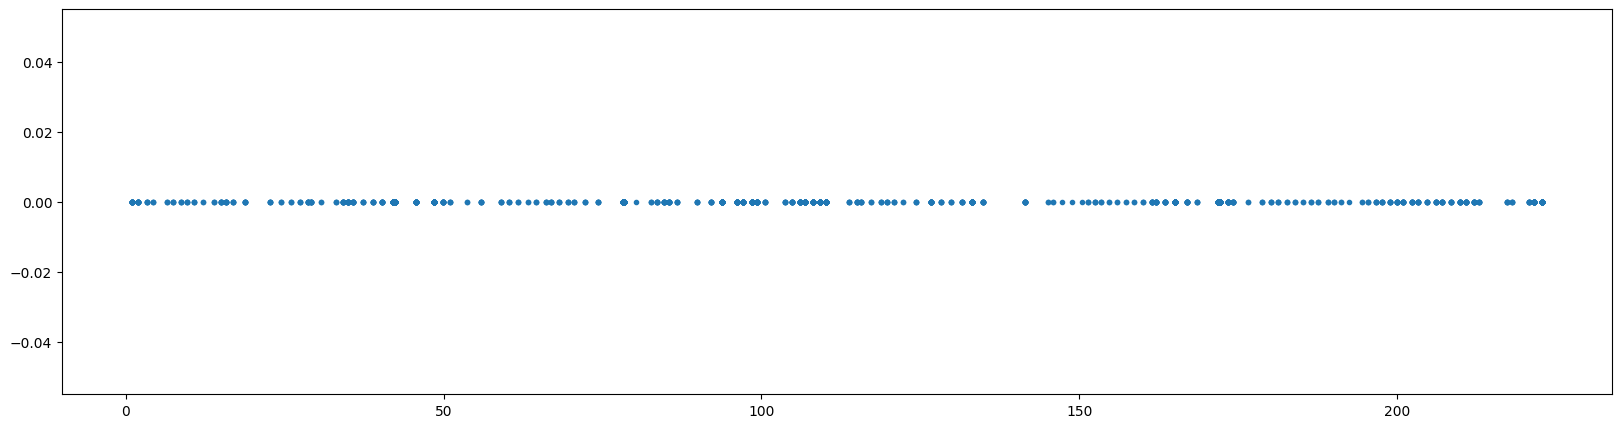

Turning points:  [  1.    1.8   3.3   4.3   6.5   7.3   8.6   9.6  10.6  12.2  13.8  15.
  15.8  16.9  18.7  22.6  24.4  25.9  27.4  28.7  29.1  30.6  33.1  34.1
  34.9  35.8  37.4  38.9  40.3  42.1  42.3  45.6  48.5  49.9  51.   53.7
  55.9  59.1  60.2  61.7  63.3  64.6  66.   66.9  68.1  69.5  70.5  72.2
  74.3  78.2  78.4  80.3  82.6  83.6  84.7  85.4  86.7  89.9  92.1  93.7
  96.1  97.1  98.5  99.3 100.6 103.7 104.8 106.1 106.8 108.1 109.2 110.2
 113.7 115.  115.7 117.3 118.8 119.8 120.9 122.2 124.3 126.7 128.3 129.8
 131.6 133.1 134.9 141.5 145.1 145.9 147.4 148.9 150.4 151.4 152.5 153.5
 154.8 156.  157.4 158.7 160.  161.4 162.1 163.5 165.1 167.1 168.5 171.8
 172.1 173.4 174.3 176.6 178.7 180.2 181.3 182.7 184.  185.2 186.5 187.5
 189.2 190.1 191.1 192.4 194.5 195.5 196.7 197.7 198.9 200.1 201.  202.4
 203.3 204.7 206.1 207.1 208.6 210.  210.9 212.1 213.  217.3 218.2 220.7
 221.7 222.8]


In [9]:
import wave
import scipy
import numpy as np
import matplotlib.pyplot as plt

wav_file_name = "pasoori (3)"

# Opening wave file as object
with wave.open(wav_file_name + ".wav", "rb") as wav_obj:
  # Getting metadata of wave audio
  sample_freq = wav_obj.getframerate()
  n_samples = wav_obj.getnframes()
  n_channels = wav_obj.getnchannels()
  signal_wave = wav_obj.readframes(n_samples)
print(n_samples, sample_freq)

# Converts a buffer(byte) object to an Int16 array
signal_array = abs(np.frombuffer(signal_wave, dtype=np.int16))
signal_length = n_samples/sample_freq # In seconds

# Smoothes the wave signal to allow for easier data analysis
filt_num = sample_freq
filt = np.ones(filt_num)/filt_num
signal_smoothed = scipy.signal.fftconvolve(signal_array, filt, mode="same")

# Creates an array corresponding to the time of each audio sample
times = np.linspace(0, signal_length, num=n_samples)

# Creates a Fast Fourier Transform of the smoothed signal array
signal_fft = np.fft.fft(signal_smoothed)

signal_stripped_fft = signal_fft
signal_stripped_fft[100:] = 0

fft_smoothed = np.fft.ifft(signal_stripped_fft)
conv_smoothed = scipy.signal.fftconvolve(fft_smoothed, filt, mode="same") # secondary smoothing

times_len = len(times)
wave_len = len(conv_smoothed)
half_diff = (times_len - wave_len)//2

#Calculating gradients and turning points
smoothed_gradient = np.gradient(conv_smoothed, times).real
turning_points = np.where(np.round(smoothed_gradient, 1) == 0)[0]
turning_points_seconds = turning_points/sample_freq

distinct_tps = np.asarray(sorted(list(set(np.round(turning_points_seconds, 1)))))
print(distinct_tps)
with open("turning_points.txt", 'w') as tps:
  turning_points_seconds = turning_points/sample_freq
  turning_points_seconds.tofile(tps, sep=', ')

plt.figure(figsize=(20,5))
#plt.plot(times, fft_smoothed)
plt.plot(turning_points/sample_freq, np.zeros(len(turning_points)), '.')
#plt.plot(times, smoothed_gradient, color="r")
plt.show()
# Prints the times(in seconds) of turning points
print("Turning points: ", distinct_tps)



[  1.    1.8   3.3   4.3   6.5   7.3   8.6   9.6  10.6  12.2  13.8  15.
  15.8  16.9  18.7  22.6  24.4  25.9  27.4  28.7  29.1  30.6  33.1  34.1
  34.9  35.8  37.4  38.9  40.3  42.1  42.3  45.6  48.5  49.9  51.   53.7
  55.9  59.1  60.2  61.7  63.3  64.6  66.   66.9  68.1  69.5  70.5  72.2
  74.3  78.2  78.4  80.3  82.6  83.6  84.7  85.4  86.7  89.9  92.1  93.7
  96.1  97.1  98.5  99.3 100.6 103.7 104.8 106.1 106.8 108.1 109.2 110.2
 113.7 115.  115.7 117.3 118.8 119.8 120.9 122.2 124.3 126.7 128.3 129.8
 131.6 133.1 134.9 141.5 145.1 145.9 147.4 148.9 150.4 151.4 152.5 153.5
 154.8 156.  157.4 158.7 160.  161.4 162.1 163.5 165.1 167.1 168.5 171.8
 172.1 173.4 174.3 176.6 178.7 180.2 181.3 182.7 184.  185.2 186.5 187.5
 189.2 190.1 191.1 192.4 194.5 195.5 196.7 197.7 198.9 200.1 201.  202.4
 203.3 204.7 206.1 207.1 208.6 210.  210.9 212.1 213.  217.3 218.2 220.7
 221.7 222.8]


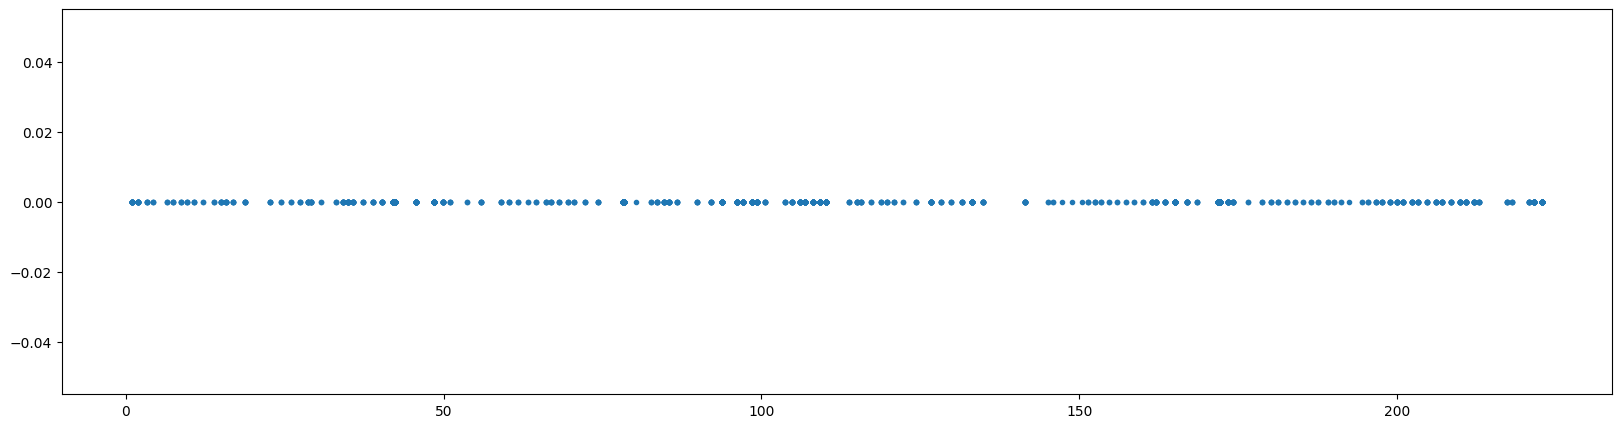

Turning points:  [  1.01360544   1.01362812   1.01365079 ... 222.76843537 222.76845805
 222.76848073]


In [8]:
#Calculating gradients and turning points
smoothed_gradient = np.gradient(conv_smoothed, times).real
turning_points = np.where(np.round(smoothed_gradient, 1) == 0)[0]
turning_points_seconds = turning_points/sample_freq

distinct_tps = np.asarray(sorted(list(set(np.round(turning_points_seconds, 1)))))
print(distinct_tps)
with open("turning_points.txt", 'w') as tps:
  turning_points_seconds = turning_points/sample_freq
  turning_points_seconds.tofile(tps, sep=', ')

plt.figure(figsize=(20,5))
#plt.plot(times, fft_smoothed)
plt.plot(turning_points/sample_freq, np.zeros(len(turning_points)), '.')
#plt.plot(times, smoothed_gradient, color="r")
plt.show()
# Prints the times(in seconds) of turning points
print("Turning points: ", turning_points/sample_freq)
